# Tutorial 1: Fundamentals of deep learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Porque Deep Learning?

El aprendizaje profundo o *deep learning* es un subcampo del *machine learning*, donde su principal caracteristica es el uso de modelo de redes neuronales profundas.

El uso de redes neuronales poseen la capacidad de encontrar **relaciones cuantitativas y/o cualitativas** para **grandes volumenes de datos**. Dentro de este tutorial nos enfocaremos en la capacidad de **prediccion** que tienen estas redes.

Consideremos un subconjunto de datos $\{ \mathbf{x}_i, y_i \}_{i=1}^{n}$, donde $\mathbf{x}_i$ son las caracteristicas o features y $y_i$ es una caracteristica continua o discreta a predecir. Habitualmente se considera las caracteristicas sobre un tensor o matriz de caracteristicas $\mathbf{X}$ de dimension $n \times F$, con $n$ la cantidad de datos y $F$ la cantidad de features, asimismo se considera un vector de salida o *outputs* $\mathbf{y}$ de dimension $n \times 1$ en caso de una prediccion unidimensional.

El objetivo es encontrar una relacion entre las caracteristicas $\mathbf{X}$ y el output $\mathbf{y}$, donde se busca la funcion $\mathbf{F}(\mathbf{X})$, que cumpla lo siguiente:

$$
\mathbf{y} = \mathbf{F}(\mathbf{X})
$$

La busqueda de la funcion $\mathbf{F}$ es el punto central en los distintos modelos y arquitectura, una parte fundamental es evaluar la prediccion del modelo con respecto al valor real. Respecto a esto, se define una funcion de perdida de error cuadratico medio (*Mean Squared Error*) como sigue:

$$
\mathcal{L}_2 (\hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i -\hat{y}_i)^2
$$

Con $\hat{y}_i$ es la evaluacion de la funcion $\mathbf{F}$ sobre el dato $x_i$. La eleccion de la funcion de perdida no es unica, y dependera del fenomeno a predecir

## Que tipo de problemas puedo resolver?

Los alcances que tienen las redes neuronales estan sujetos a la disponibilidad de datos y a la capacidad de computo. A medida que se obtengan mas datos, aumentan la cantidad de fenomenos que se pueden modelar por medio de estas redes.

Un ejemplo son los campos de fuerzas para la simulacion o descubrimiento de nuevos materiales, donde existen diversas arquitecturas contrastadas por la iniciativa [MatBench Discovery](https://matbench-discovery.materialsproject.org/)

![image](https://pbs.twimg.com/media/GQ6dGxSXYAAF7kB?format=jpg&name=4096x4096)

Otro ejemplo que se revisara dentro de esta serie de tutoriales es la arquitectura **SchNet** [(K. T. Schutt et al.)](https://arxiv.org/pdf/1706.08566), que busca a traves de capas convolucionales con filtros continuos poder modelar interacciones cuanticas dentro de las moleculas. Con esto se pueden predecir como la energia libre $G$, el calor especifico a volumen constante $C_v$ o la entalpia $H$

![image](https://d3i71xaburhd42.cloudfront.net/5bf31dc4bd54b623008c13f8bc8954dc7c9a2d80/3-Figure1-1.png)

## Ejemplo: Calculo de solubilidad de moleculas

Ejemplo de calculo de solubilidad usando datos del *deep learning for molecules & materials* de ([Andrew White](https://dmol.pub/index.html))

In [2]:
soldata = pd.read_csv(
    "https://github.com/whitead/dmol-book/raw/main/data/curated-solubility-dataset.csv"
)
features_start_at = list(soldata.columns).index("MolWt")
feature_names = soldata.columns[features_start_at:]

In [3]:
soldata

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


Para trabajar los datos se tomaran 100 datos al azar y se usaran 80 datos para entrenamiento y 20 datos para test, esto es una muestra muy pequena para trabajar por lo que solo es para motivos de ejemplos.

Las features que se trabajaran son las siguientes

In [4]:
feature_names

Index(['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

Otro paso importante es estandarizar las features continuas que tenga el modelo, esto es en terminos simples aplicar la siguiente transformacion a cada dato
$$
\hat{x}_i = \frac{x_i - \mu_i}{\sigma_i}
$$

Donde $\hat{x}_i$ es el dato normalizado, $\mu$ es el promedio de la feature dentro de los datos de entrenamiento o testeo, y asimismo es para $\sigma$ que es la desviacion estandar.



In [17]:
# Obtener 100 puntos distintos del csv
sample = soldata.sample(200, replace=False)
train = sample[:160].copy() #datos de entrenamiento
test = sample[160:].copy() #datos de testeo

# estandarizacion usando solo datos de entrenamiento
test[feature_names] -= train[feature_names].mean()
test[feature_names] /= train[feature_names].std()
train[feature_names] -= train[feature_names].mean()
train[feature_names] /= train[feature_names].std()

# convertir dataframes en numpy arrays
x = train[feature_names].values
y = train["Solubility"].values
test_x = test[feature_names].values
test_y = test["Solubility"].values

# Crear matriz X con columna de 1 para tener en el modelo un intercepto
_x = np.hstack([np.ones((x.shape[0], 1)), x])
_test_x = np.hstack([np.ones((test_x.shape[0], 1)), test_x])

El modelo a trabajar es lineal del tipo

$$
\mathbf{y} = \mathbf{F}(\mathbf{X}) = \mathbf{X} \mathbf{\beta}
$$

El cual es un modelo simple de regresion lineal univariable [(Ordinary least squares model)](https://en.wikipedia.org/wiki/Ordinary_least_squares). Recordando que la matriz $A$ es del siguiente tipo

$$
A = \begin{pmatrix}
| & | & | & \cdots  & | \\
1 & x_1 & x_2 & \cdots  & x_n \\
| & | & | & \cdots  & |
\end{pmatrix}
$$

Donde en el fondo se busca los mejores coeficientes $\beta_i$, para quedar una aproximacion de la variable $\hat{y}$ igual a

$$
\hat{y} = \sum_{j=1}^{F} \beta_j x_j
$$

La busqueda esta sujeta a la siguiente perdida, que conserva semejanza en el error cuadratico medio, excepto en la parte de promediar el resultado

$$
\hat{\beta} = \text{argmin}_{\beta} \left\| \mathbf{y} - \mathbf{X} \mathbf{\beta}  \right\| ^2
$$

Afortunadamente este modelo es conocido y posee solucion analitica la cual es la siguiente

$$
\mathbf{\hat{\beta}} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{Y}
$$

In [18]:
# solucion analitica del modelo univariable
beta = (np.linalg.inv(_x.T @ _x)@ _x.T) @ y
# implementacion en scikit-learn
reg = LinearRegression()
reg = reg.fit(x,y)

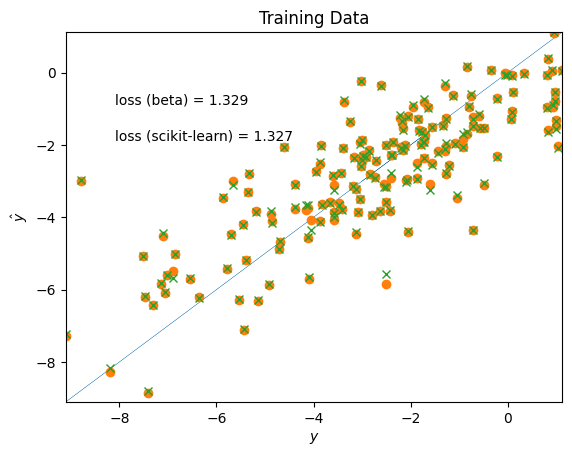

In [19]:
plt.plot(y, y, linewidth=0.2)
plt.plot(y, _x @ beta, "o")
plt.plot(y,reg.predict(x),'x')
plt.xlim(min(y), max(y))
plt.ylim(min(y), max(y))
plt.ylabel('$\hat{y}$')
plt.xlabel('$y$')
plt.text(min(y) + 1, max(y) - 2, f"loss (beta) = {np.sqrt(np.mean((y - _x @beta)**2)):.3f}")
plt.text(min(y) + 1, max(y) - 3, f"loss (scikit-learn) = {np.sqrt(np.mean((y - reg.predict(x))**2)):.3f}")
plt.title("Training Data")
plt.show()

Ambos son similares, las ligeras diferencias entre modelos se explican en la diferentes implementacion numericas que se pueden hacer del modelo de regresion unidimensional

Hasta el momento, no se ha mencionado nada de redes neuronales, pero esto no significa que no se pueden aplicar a este mismo problema.

Existen distintos tipos de arquitecturas dependiendo del tipo de dato $\mathbf{X}$ se entregue al modelo. Los modelos mas famosos son las redes FCNN (Fully Connected Neural Network), la cual se asocian a una arquitectura como la siguiente [(Mahboob et al.)](https://arxiv.org/abs/2303.01633)

![image](https://www.researchgate.net/publication/369021391/figure/fig4/AS:11431281124688541@1678072808589/Fully-Connected-Neural-Network-FCNN.ppm)

Estas tienen como bloque basico el concepto de *capa* (*Layer*), el cual consiste en una operacion lineal seguida por una operacion no lineal sobre los datos. Una red puede tener tanta capas como desee, donde la cantidad de *nodos* dentro de una capa tambien se puede disminuir o aumentar segun eleccion.

Para otros tipos de redes el concepto de *capa* se mantiene, pero lo que ocurre dentro de cada una es distinto, como por ejemplo ocurre en el caso de las *capas convolucionales* o en las *LSTM*

En el caso de las FCNN, una capa es matematicamente lo siguiente
$$
\mathbf{x}_i^{l+1} = \sigma ( \mathbf{W}^{l} \mathbf{x}_i^{l} + b^l)
$$

Donde $\mathbf{x}_i$ es una fila o dato de la matrix $\mathbf{X}$, $\mathbf{W}$ es una matriz de pesos que debe ser optimizada, $b$ es el bias del modelo, y $\sigma()$ es la funcion de activacion no lineal

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

class FCNN_example(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FCNN_example, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = 17
hidden_size = 8
output_size = 1
model = FCNN_example(input_size, hidden_size)

criterion = nn.MSELoss()  # MSE loss function
optimizer = optim.Adam(model.parameters(), lr=0.1)
num_epochs=600


# Train process
for k in range(num_epochs):
  optimizer.zero_grad()    # Limpiar los gradientes
  outputs = model(torch.from_numpy(x).float())
  loss = criterion(outputs[:,0], torch.tensor(y).float())
  loss.backward()          # Retropropagar los gradientes
  optimizer.step()         # Actualizar los pesos

  if ((k+1) % 40) == 0 or k==0:
    print(f'Pérdida epoch {k+1}: {loss.item()}')

Pérdida epoch 1: 13.270116806030273
Pérdida epoch 40: 1.6751638650894165
Pérdida epoch 80: 1.2975609302520752
Pérdida epoch 120: 1.0585527420043945
Pérdida epoch 160: 0.6605180501937866
Pérdida epoch 200: 0.4849652647972107
Pérdida epoch 240: 0.4467269778251648
Pérdida epoch 280: 0.41004377603530884
Pérdida epoch 320: 0.4143243730068207
Pérdida epoch 360: 0.4150615632534027
Pérdida epoch 400: 0.34611600637435913
Pérdida epoch 440: 0.4695258140563965
Pérdida epoch 480: 0.3300599455833435
Pérdida epoch 520: 0.6817399859428406
Pérdida epoch 560: 0.31788551807403564
Pérdida epoch 600: 0.3292001783847809


Notablemente alcanzo una perdida mas baja, revisemos ahora comparando con el modelo que habiamos visto con anterioridad

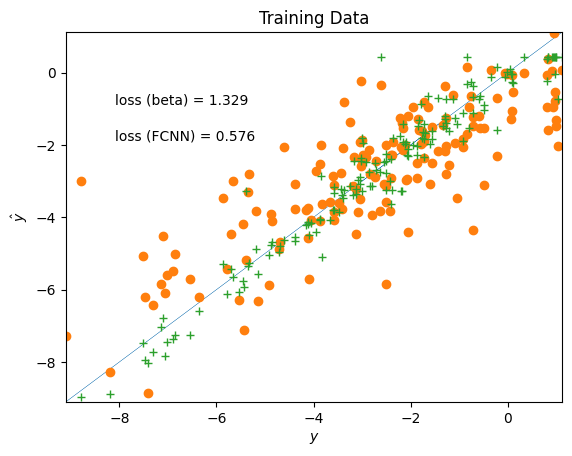

In [32]:
model.eval()
plt.plot(y, y, linewidth=0.2)
plt.plot(y, _x @ beta, "o")
plt.plot(y,model(torch.from_numpy(x).float()).detach().numpy().reshape(160),'+')
plt.xlim(min(y), max(y))
plt.ylim(min(y), max(y))
plt.ylabel('$\hat{y}$')
plt.xlabel('$y$')
plt.text(min(y) + 1, max(y) - 2, f"loss (beta) = {np.sqrt(np.mean((y - _x @beta)**2)):.3f}")
plt.text(min(y) + 1, max(y) - 3, f"loss (FCNN) = {np.sqrt(np.mean((y - model(torch.from_numpy(x).float()).detach().numpy().reshape(160))**2)):.3f}")
plt.title("Training Data")
plt.show()

Efectivamente el modelo con redes neuronales esta mas cercano a los valores reales que se tienen de las variables. Eso si, la historia no esta completa ya que para decidir si un modelo tiene mejor rendimiento sobre otro se debe mirar sobre datos que no hayan sido usados para el entrenamiento, es decir, el **test data**

Veamos con los datos de testeo

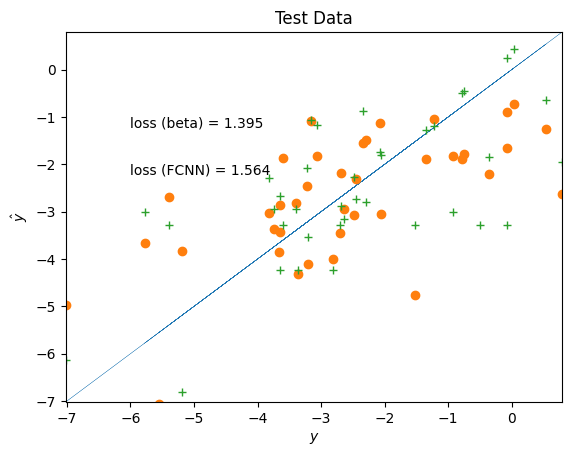

In [33]:
model.eval()
plt.plot(test_y, test_y, linewidth=0.2)
plt.plot(test_y, _test_x @ beta, "o")
plt.plot(test_y,model(torch.from_numpy(test_x).float()).detach().numpy().reshape(40),'+')
plt.xlim(min(test_y), max(test_y))
plt.ylim(min(test_y), max(test_y))
plt.ylabel('$\hat{y}$')
plt.xlabel('$y$')
plt.text(min(test_y) + 1, max(test_y) - 2, f"loss (beta) = {np.sqrt(np.mean((test_y - _test_x @beta)**2)):.3f}")
plt.text(min(test_y) + 1, max(test_y) - 3, f"loss (FCNN) = {np.sqrt(np.mean((test_y - model(torch.from_numpy(test_x).float()).detach().numpy().reshape(40))**2)):.3f}")
plt.title("Test Data")
plt.show()

Aca la perdida de las redes neuronales es mayor a la del modelo base. Que fue lo que paso?

Dentro de deep learning existen los conceptos de **underfitting** y **overfitting**, el detalle de como ver estos conceptos requiere conceptos mas profundos en estadistica, pero en palabras simples **underfitting** es cuando falta entrenamiento para reducir el **bias** (sesgo), esto es solucionable con un modelo mas complejo o aumentando la cantidad de epocas de entrenamientos. El contrario es el **overfitting**, las causas son variadas, pero consiste en un modelo que esta *sobre ajustado* con respecto al modelo real, puede ser porque aprendio la variabilidad de los datos, o el modelo es demasiado complejo para la funcion a aprender.

Este concepto se puede profundizar en los excelentes videos de Statquest!
[![alt text](https://i.ytimg.com/vi/EuBBz3bI-aA/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLAFC1NDSZzr6NLGVATrwuQHS9BGvA)](https://www.youtube.com/watch?v=EuBBz3bI-aA)